In [1]:
import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

(sec:scope_bigdata)=
# Big Data and New Opportunities  

The tremendous increase in openly available data has created new roles and opportunities in data science. For example, data journalists look for interesting stories in data much like how traditional beat reporters hunt for news stories. The data lifecycle for the data journalist begins with the search for existing data that might have an interesting story, rather than beginning with a research question and looking for how to collect new or use existing data to address the question.  

Citizen science projects are another example. They engage many people (and instruments) in data collection. Collectively, these data are often made available to researchers who organize the project and often they are made available in repositories for the general public to further investigate. 

The availability of administrative and organizational data creates other opportunities. Researchers can link data collected from scientific studies with, say, medical data that have been collected for healthcare purposes; these administrative data that have been collected for reasons that don't directly stem from the question of interest can be useful in other settings. Such linkages can help data scientists expand the possibilities of their analyses and cross-check the quality of their data. In addition, found data can include digital traces, such as your web-browsing activity, posts on social media, and online network of friends and acquaintances, and can be quite complex. 

When we have large amounts of administrative data or expansive digital traces, it can be tempting to treat them as more definitive than data collected from traditional smaller research studies. We might even consider these large datasets as a replacement for scientific studies or essentially a census. This over-reach is referred to as the "big data hubris"[^Lazer14]. Data with a large scope does not mean that we can ignore foundational issues of how representative the data are, nor can we ignore issues with measurement, dependency, and reliability. One well-known example is the Google Flu Trends tracking system.  

[^Lazer14]: [Lazer, Kennedy, King, and Vespignani. The parable of google flu: traps in big data analysis. Science, 343:1203––1205, 2014.](https://gking.harvard.edu/files/gking/files/0314policyforumff.pdf)

[^Lazer15]: [Lazer. What we can learn from the epic failure of google flu trends. Wired, oct 2015.](https://www.wired.com/2015/10/can-learn-epic-failure-google-flu-trends/)

## Example: Google Flu Trends

Digital epidemiology, a new subfield of epidemiology, leverages data generated outside the public health system to study patterns of disease and health dynamics in populations[^nih].
The Google Flu Trends (GFT) tracking system was one of the earliest examples of digital epidemiology.
In 2007, researchers found that counting the searches people made for flu-related
terms could accurately estimate the number of flu cases.
This apparent success made headlines, and many researchers became excited about the possibilities of big data.
However, GFT did not live up to expectations and was abandoned in 2015.

What went wrong? After all, GFT used millions of digital traces from online queries for terms related to influenza to predict flu activity. Despite initial success, in the 2011–2012 flu season, Google's data scientists found that GFT was not a substitute for the more traditional surveillance reports of three-week old counts collected by the Centers for Disease Control (CDC) from laboratories across the United States. In comparison, GFT overestimated the CDC numbers for 100 out of 108 weeks (see below). Week after week, GFT came in too high for the cases of influenza, even though it was based on big data. 

[^nih]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5754279/

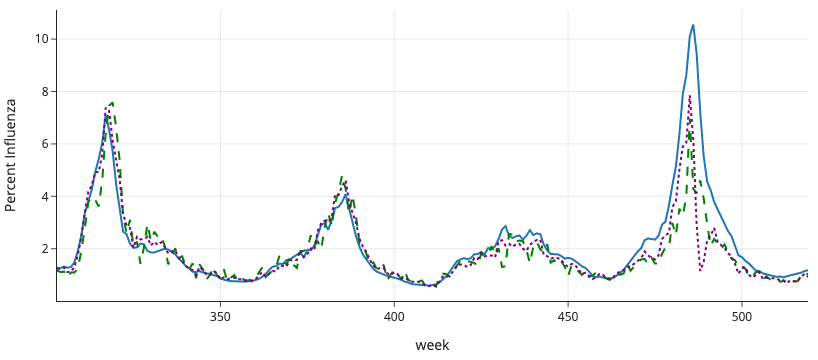

In [2]:
gft_df = pd.read_csv('data/gft.csv', 
                     usecols=['gflu','dlscflu09','degflu09'])

gft_df = gft_df.iloc[302:519]

gft_df['week'] = np.arange(303,520)

fig = px.line(gft_df, x='week', y='gflu', width=400, height=250)

fig.add_trace(go.Scatter(
        x=gft_df['week'], y=gft_df['dlscflu09'],
        mode="lines", 
        line=go.scatter.Line(color='green', width=2, dash='dash'),
        showlegend=False))

fig.add_trace(go.Scatter(
        x=gft_df['week'], y=gft_df['degflu09'],
        mode="lines", 
        line=go.scatter.Line(color='purple', width=2, dash='dot'),
        showlegend=False))
                 
fig.update_yaxes(title_text='Percent Influenza')
fig.show()

From weeks 412 to 519 in this plot, GFT (solid line) over estimated the actual CDC reports (dashed line) 100 times. Also plotted here are predictions from a model based on 3-week old CDC data and seasonal trends (dotted line), which follows the actuals more closely than GFT.  

Data scientists found that a simple model built from past CDC reports that used 3-week-old CDC data and seasonal trends did a better job of predicting flu prevalence than GFT. The GFT overlooked considerable information that can be extracted by basic statistical methods. This does not mean that big data captured from online activity is useless. In fact, researchers have shown that the combination of GFT data with CDC data can substantially improve on both GFT predictions and the CDC-based model[^Lazer15]. It is often the case that combining different approaches leads to improvements over individual methods.

The GFT example shows us that even when we have tremendous amounts of information, the connections between the data and the question being asked are paramount. Understanding this framework can help us avoid answering the wrong question, applying inappropriate methods to the data, and overstating our findings. 

:::{note}

In the age of big data, we are tempted to collect more and more data to answer a question precisely. After all, a census gives us perfect information, so shouldn't big data be nearly perfect? Unfortunately, this is often not the case, especially with administrative data and digital traces. The inaccessibility of a small fraction of the people you want to study (see the 2016 election upset in {numref}`Chapter %s <ch:theory_datadesign>`) or the measurement process itself (as in this GFT example) can lead to poor predictions. It is important to consider the scope of the data as it relates to the question under investigation.      

:::

A key factor to keep in mind is the scope of the data. Scope includes considering the population we want to study, how to access information about that population, and what we are actually measuring. Thinking through these points can help us see potential gaps in our approach. This is the topic of the next section.